In [36]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *=0.9

x,y=naca4(nx,20)
bb=y
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
aa=y

## 根据B样条曲线确定nn参数  两组参数
x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

## 调整点的水平坐标
x=np.array([])
y1=np.array([])
x = np.append(x,np.linspace(0,0.209000013,4))
x = np.append(x,[0.23, 0.25,0.3,0.36900047])
x = np.append(x,[0.54000079,0.699857958])
x = np.append(x,np.linspace( 0.7,0.9,3))


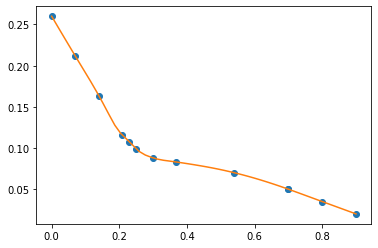

In [37]:
y1 = np.append(y1,np.linspace(0.26, 0.1155,4) )# 此处调机头高低
y1 = np.append(y1,[0.10776 ,0.099 ] ) # 此处使过渡平滑


y1 = np.append(y1,[0.088,0.083,0.070,0.050021] )  # 此处点不变
y1 = np.append(y1,np.linspace(0.05,0.02,3))


from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)   # ny1就是插值得到的y值，也就是要求的delta
plt.plot(x,y1,"o",nx,ny1)

t=''
with open ('F:\Fuselagehead-change.txt','a') as q:

    for i in y1:
        t=t+str(i)+'	'
    q.write(t.strip(' '))
    q.write('\n')
    q.close()
    t=''
    


(-0.5568750000000001, 11.694375, -2.1368382805410353, 0.5877940727384174)

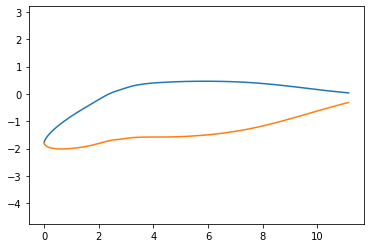

In [38]:
## 下移坐标
nx*=1.8
nx*=6.875
zmax=[]
zmin=[]
psi = np.linspace(0,2*pi,81)
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    z*=6.875
    y*=6.875
    zmax.append(z.max())
    zmin.append(z.min())
plt.plot(nx,zmax)
plt.plot(nx,zmin)
plt.axis("equal")

(-0.9076723599205734,
 0.9076723599205734,
 -2.1368382805410353,
 0.5877940727384174)

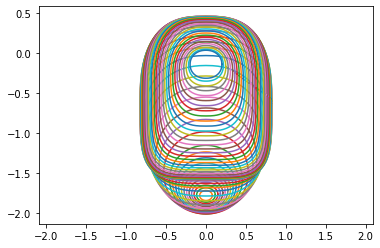

In [39]:
## 生成机身
of = open("F:\Fuselagehead_0.26.txt",'w') 
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    z*=6.875
    y*=6.875
    plt.plot(y,z)
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.axis("equal")
